In [2]:
import numpy as np
from numpy import *
from numpy import nan
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
# %pylab
# pd.set_option('display.mpl_style', 'default')
# import scipy.integrate
plt.style.use(astropy_mpl_style)

In [3]:
#Need to get rid of 0 points (non readings) and bad readings
def FancyPlot(xlab='',ylab='',lw=2.5,lfs=45,tfs=25,size_x=20,size_y=11):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    mpl.rcParams['mathtext.default'] = 'regular'
    fig = plt.figure(figsize=(size_x,size_y))
    ax=fig.add_subplot(111)
    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)
    ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax.grid(False)
    return fig,ax
def HexPlot(xlab1='',ylab1='',xlab2='',ylab2='',xlab3='',ylab3='',\
           wspace=0.25,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=7,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    fig,axarr =plt.subplots(1,3,figsize=(size_x,size_y))
    gs=gridspec.GridSpec(1,3)
    gs.update(wspace=wspace)
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    ax3=plt.subplot(gs[2])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax3.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax3.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    ax3.set_xlabel(xlab3,fontsize=lfs)
    ax3.set_ylabel(ylab3,fontsize=lfs)
    
    ax1.grid(False)
    ax2.grid(False)
    ax3.grid(False)
    return fig,ax1,ax2,ax3
def StackedPlot(xlab1='',ylab1='',xlab2='',ylab2='',\
                hspace=0.01,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=11,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    
    fig,axarr =plt.subplots(2,1,figsize=(size_x,size_y),sharex=True,sharey=True)
    gs=gridspec.GridSpec(2,1,height_ratios=(9, 2))
    gs.update(hspace=hspace)
    
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=0)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax1.set_xticklabels([],c='w')
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=0)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax2.set_xticks([3,4,5,6,7,8])
    ax2.set_yticks([-1,0,1])
#     ax2.
#     ax2.set_xlim
    
#     ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    if Grid:
        axs[0].grid()
        axs[1].grid()
    ax1.grid(False)
    return fig,ax1,ax2

/tmp/ipykernel_841844/2335613774.py:56: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/tmp/ipykernel_841844/2335613774.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


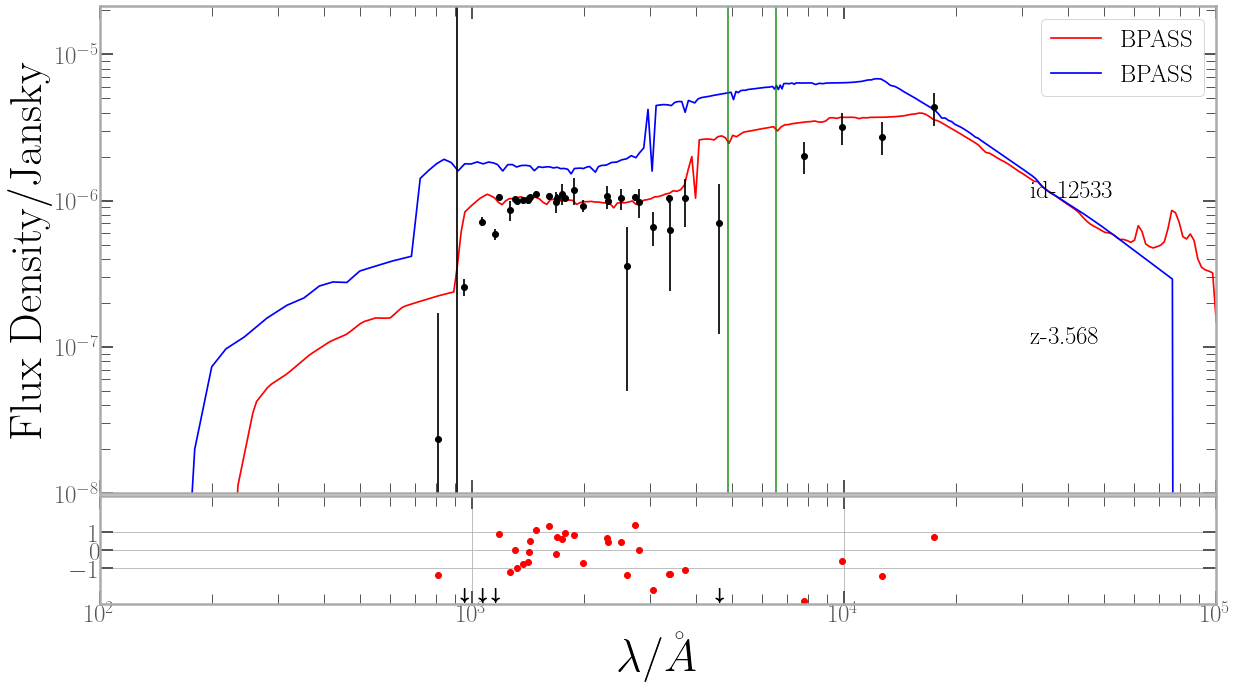

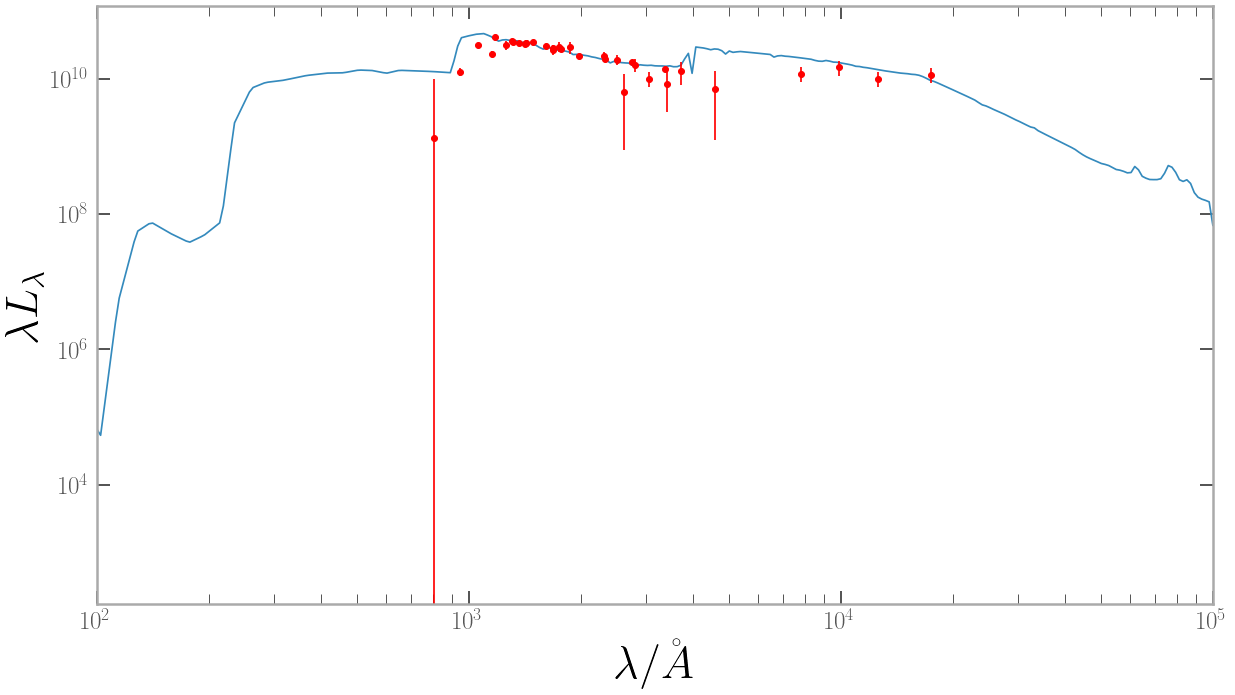

In [50]:
path = os.path.expanduser('~/R-Stuff/ZFNMBPASS/')
# Montague = pd.read_csv(os.path.expanduser('~/R-Stuff/'+'ZFOURGE-ProSpect-new.csv')) 
Montague = pd.read_csv(os.path.expanduser('~/R-Stuff/'+'ProSpect-ZFOURGE.csv'))

light=2.998*(10**18) #A/s
for Treesa in range(1):

#     potato=str(Montague['id'].iloc[Treesa])#11999
#     redshift =float(Montague['redshift'].iloc[Treesa])
    
    potato=str(12533)#11999
    redshift =float(Montague[Montague['id']==float(potato)]['redshift'])
    galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+potato+'_SED_bestfit.txt'),index_col=None,on_bad_lines='skip',delim_whitespace=True)
    galaxy_sed_unatten = pd.read_csv(os.path.expanduser(path+'/'+potato+'_SED_unatten.txt'),index_col=None,on_bad_lines='skip',delim_whitespace=True)
    galaxy_bands = pd.read_csv(os.path.expanduser(path+'/'+potato+'_SED_bands_data.txt'),index_col=None,on_bad_lines='skip',delim_whitespace=True)
    bestfits = pd.read_csv(os.path.expanduser(path+'/'+potato+'_SED_bands_bestfit.txt'),index_col=None,on_bad_lines='skip',delim_whitespace=True)
    
    
#     print('residual calculation does not include division')
    fig,ax1,ax2 = StackedPlot('','Flux Density/Jansky',r'$\lambda/\AA$','')   
    ax1.plot(galaxy_sed['bestfit_x']/(1+redshift),galaxy_sed['bestfit_y'],c='r',label='BPASS')   
    ax1.plot(galaxy_sed_unatten['wave']/(1+redshift),galaxy_sed_unatten['fluxDensity'],c='b',label='BPASS')
    ax1.errorbar(galaxy_bands['data_x']/(1+redshift),galaxy_bands['data_y'],yerr=galaxy_bands['data_y_err'],c='k',fmt='o')
    ax1.annotate('id-'+str(potato),xy=(10**4.5,max(galaxy_sed['bestfit_y'])*0.08),size=25)
    ax1.annotate('z-'+str(redshift),xy=(10**4.5,max(galaxy_sed['bestfit_y'])*0.008),size=25)
    ax1.axvline(x=912,c='k')
    ax1.axvline(x=4861.0,c='g',alpha=0.8)
    ax1.axvline(x=6563.0,c='g',alpha=0.8)
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.legend(loc='best')
    ax1.set_xlim(left=10**2,right=10**5)
    ax1.set_ylim(10**-8,max(galaxy_sed['bestfit_y'])*1.6)
    
    res = np.full(len(galaxy_bands), np.nan)  # Initialize res array

    for i in range(len(galaxy_bands)):
        if pd.notna(galaxy_bands['data_y'][i]):  
            res[i] = ((galaxy_bands['data_y'][i]) - (bestfits['bestfit_data_y'][i])) / galaxy_bands['data_y_err'][i]

    for i in range(len(res)):
        if pd.notna(res[i]):  # Check if res[i] is not NaN
            if abs(res[i]) <= 3:
                ax2.scatter(galaxy_bands['data_x'][i]/(1+redshift), res[i], c='red')
            elif res[i] > 3:
                ax2.scatter(galaxy_bands['data_x'][i]/(1+redshift), 2.5, c='black', marker=r'$\uparrow$', s=200)
            elif res[i] < -3:
                ax2.scatter(galaxy_bands['data_x'][i]/(1+redshift), -2.5, c='black', marker=r'$\downarrow$', s=200)
    ax2.set_xscale('log')
    ax2.set_xlim(left=10**2,right=10**5)
    ax2.set_ylim(-3,3)

    ###################################################Luminosity Plot#############################################
    # f_nu=galaxy_sed['bestfit_y']
    x=cosmo.luminosity_distance(redshift)
    meters=x*3.0857*10**22 #Mpc to m
    dist = meters.value
    
    L_nu_sed=(galaxy_sed['bestfit_y']*(4*pi*dist**2))/(3.826*10**26*(1+redshift)*10**26)
    L_nu_bands = (galaxy_bands['data_y']*(4*pi*dist**2))/(3.826*10**26*(1+redshift)*10**26)
    L_nu_bands_er = (galaxy_bands['data_y_err']*(4*pi*dist**2))/(3.826*10**26*(1+redshift)*10**26)
    #L_lambda=L_nu*light/(lambda_cA)**2
    lamL_lam_sed = L_nu_sed*light/(galaxy_sed['bestfit_x'])
    lamL_lam_bands = L_nu_bands*light/(galaxy_bands['data_x'])
    lamL_lam_bands_er = L_nu_bands_er*light/(galaxy_bands['data_x'])

    fig,ax=FancyPlot(r'$\lambda/\AA$',r'$\lambda L_{\lambda}$')
    ax.plot(galaxy_sed['bestfit_x']/(1+redshift),lamL_lam_sed)
    ax.errorbar(galaxy_bands['data_x']/(1+redshift),lamL_lam_bands,yerr=lamL_lam_bands_er,fmt='o',c='red')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(left=10**2,right=10**5)
#     ax.set_ylim(10**9,max(lamL_lam_sed)*1.6)



In [41]:
Montague[Montague['id']==float(potato)]['redshift']

Series([], Name: redshift, dtype: float64)

In [43]:
Montague[Montague['id']==float(potato)]

,Unnamed: 0,id,redshift,WFI_U38,WFI_U38_err,U,U_err,B,B_err,IA484,...,KsHI,KsHI_err,IRAC_36,IRAC_36_err,IRAC_45,IRAC_45_err,IRAC_58,IRAC_58_err,IRAC_80,IRAC_80_err


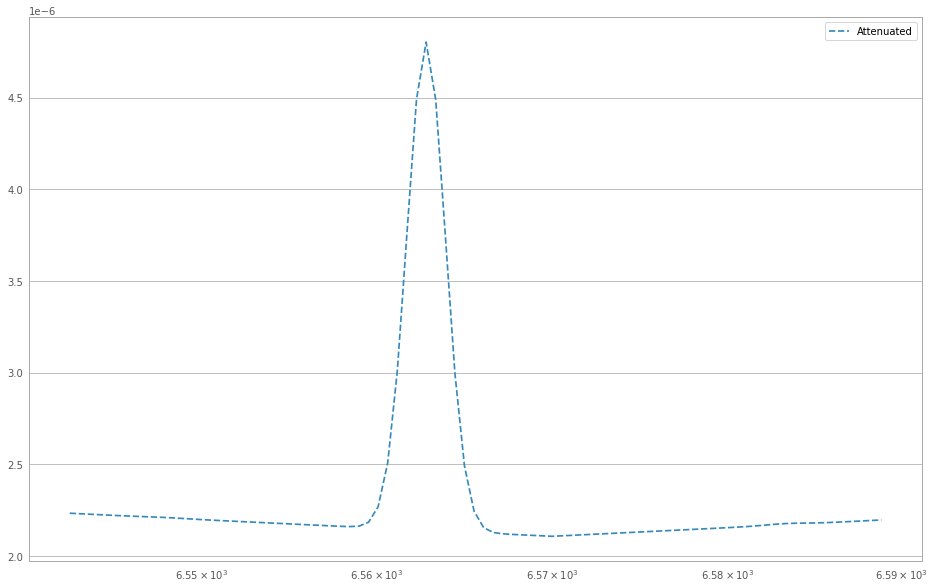

Area under the Hα line: 1.9036706247882562e-05


In [18]:
# from scipy.optimize import curve_fit
# f(x) = (1 / (σ * √(2π))) * e^(-((x - μ)^2) / (2σ^2))
# def gauss(x,y,redshift):
#     center = 6562*(redshift+1)
#     f= (1/(np.std(y)*sqrt(2*pi)))*exp(-(x-center)**2/(2(*np.std(y)**2)))
#     return f
# def fitting(x, peak, mean, std_dev, background):
# #     print(background)
#     return gauss(x, peak, mean, std_dev, background)
path = os.path.expanduser('~/R-Stuff/ZFNMBPASS/')
Montague = pd.read_csv(os.path.expanduser(path+'ProSpect-ZFOURGE.csv')) 
from scipy.optimize import curve_fit
a=11999
galaxy_sed = pd.read_csv(os.path.expanduser('~/R-Stuff/Test/'+str(a)+'_SED_bestfit.txt'),index_col=None,on_bad_lines='skip',delim_whitespace=True)
# galaxy_sed_unatten = pd.read_csv(os.path.expanduser('~/R-Stuff/Test/'+str(a)+'_SED_unatten.txt'),index_col=None,on_bad_lines='skip',delim_whitespace=True)
redshift =float(Montague[Montague['id']==a]['redshift'])
x_data = galaxy_sed['bestfit_x']/(1+redshift)
y_data = galaxy_sed['bestfit_y']
y_data = y_data[x_data<6600][x_data>6500]
x_data = x_data[x_data<6600][x_data>6500]


def gauss(x, peak, mean, std_dev, background):
    return peak / (std_dev * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mean) / std_dev)**2) + background

prior = [max(y_data[x_data<7000][x_data>6000]), 6563,50, np.mean(y_data[x_data<7000][x_data>6000])]  
params, covariance = curve_fit(gauss, x_data, y_data, p0=prior,  absolute_sigma=True)
peak, mean, std_dev, background = params
area = peak * std_dev * np.sqrt(2 * np.pi)

y_fit = gauss(x_data, *params)

plt.figure(figsize=(16,10))
# plt.axvline(6563,c='green',alpha=.5)
# plt.axvline(8000,c='red',alpha=.5)
# plt.axvline(6000,c='red',alpha=.5)
# plt.axvline(912,c='k',alpha=.5)
plt.plot(x_data, y_data, label='Attenuated',linestyle='--')
# plt.plot(x_data/(1+redshift))
# plt.plot(galaxy_sed_unatten['wave']/(1+redshift),galaxy_sed_unatten['fluxDensity'])
# plt.plot(x_data, y_fit, label='Fitted Data',alpha=0.8,linestyle='--')
plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.show()

print("Area under the Hα line:", area)


In [78]:
from scipy import stats
from scipy.stats import linregress
def linear_slope_cutoff(x,y,lower,upper):
    mask = (x >= lower)&(x <=upper)
    x_cutoff = x[mask]
    y_cutoff = y[mask]
    slope, intercept,r_value, p_value, std_err = stats.linregress(log10(x_cutoff), log10(y_cutoff))
#     x_fit = np.linspace(lower,upper,1000)
#     y_fit = slope*x_fit + intercept
    return slope,intercept, std_err

from scipy.optimize import curve_fit

def linear_func(x,a,b):
    return a*x+b
def slope_curve_fit(x,y,y_err,lower,upper):
    mask = (x >= lower)&(x <=upper)
    x_cutoff = x[mask]
    y_cutoff = y[mask]
    y_cutoff_err = y_err[mask]
#     print(y_cutoff_err)
    slope = np.nan
    slope_err = np.nan
    intercept = np.nan
    for i in y_cutoff.index:
        if y_cutoff[i] < 0:
            y_cutoff[i] = nan
            y_cutoff_err[i] = nan
#     for i in y_cutoff.index:
#         if y_cutoff[]
    valid_indices = np.sum(~np.isnan(y_cutoff))

    if valid_indices >= 3:
        mask3 = ~np.isnan(y_cutoff)
        x_cutoff = x_cutoff[mask3]
        y_cutoff = y_cutoff[mask3]
        y_cutoff_err = y_cutoff_err[mask3]
        mask2 = np.logical_not(np.isnan(y_cutoff))
        x_cutoff=x_cutoff[mask2]
        y_cutoff=y_cutoff[mask2]
        y_cutoff_err=y_cutoff_err[mask2]

    #     sigma = y_cutoff_err/np.sqrt(len(x_cutoff))
        mango = log10(y_cutoff_err+y_cutoff)
        peach = log10(y_cutoff)
        sigma= (mango-peach)
    #     print(sigma)

        popt,pcov, = curve_fit(linear_func,log10(x_cutoff), log10(y_cutoff), sigma=sigma, absolute_sigma=True)

        slope = popt[0]
        intercept = popt[1]
        slope_err = np.sqrt(pcov[0][0])
#     x_fit = np.linspace(lower,upper,1000)
#     y_fit = slope*x_fit + intercept
    return slope,slope_err, intercept#, x_fit, y_fit
#scipy curvefit
c=2.998e8
h= 6.626*10**-27#erg*s (1 J = 10**7 ergs, h is traditionally in units of J*s)
#solar luminosity ~ 3.828 *10**33 erg/s #3.846 *10**33
def integral_above_cutoff(L_nu, nu, const):
    cutoff_freq = c / (91.2e-9)
    mask = nu>cutoff_freq
    nu_above_cutoff = nu[mask]
    L_nu_above_cutoff = L_nu[mask]
    dnu = np.diff(nu_above_cutoff)
#     integrand_above_cutoff = integrand(nu_above_cutoff,L_nu_above_cutoff)
    integrand_above_cutoff = L_nu_above_cutoff[1:]/(h*nu_above_cutoff[1:])
#     print(L_nu_above_cutoff[1:])
    integral = np.sum(dnu*integrand_above_cutoff)
#     integral = np.trapz(integrand_above_cutoff, nu_above_cutoff)
    return -integral/(const)#const was x3.846*10**33

In [79]:
path = os.path.expanduser('~/R-Stuff/ZFNMEMILES/')
patho = os.path.expanduser('~/R-Stuff/ZFNMEMILESB/')
folder_name = os.path.basename(patho.rstrip('/'))  # Get the folder name "anshuB"
name_B = folder_name[:-1]
Montague = pd.read_csv(os.path.expanduser(path+'ProSpect-ZFOURGE.csv'))
light=2.998*(10**18) #speed of light in Angstroms ~ A/s
for i in range(len(Montague)):
    potato=str(Montague['id'][i])

    galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+potato+'_SED_bestfit.txt'),index_col=None,on_bad_lines='skip',delim_whitespace=True)
    galaxy_sed_unatten = pd.read_csv(os.path.expanduser(path+'/'+potato+'_SED_unatten.txt'),index_col=None,on_bad_lines='skip',delim_whitespace=True)
    galaxy_bands = pd.read_csv(os.path.expanduser(path+'/'+potato+'_SED_bands_data.txt'),index_col=None,on_bad_lines='skip',delim_whitespace=True)
#     bestfits = pd.read_csv(os.path.expanduser(path+'/'+potato+'_SED_bands_bestfit.txt'),index_col=None,on_bad_lines='skip',delim_whitespace=True)
    
    
    
    x=cosmo.luminosity_distance(redshift)
    meters=x*3.0857*10**22 #Mpc to m
    dist = meters.value
    
    nu = light/galaxy_sed['bestfit_x'] #rest frame frequency in Hertz
    L_nu_sed=(galaxy_sed['bestfit_y']*(4*pi*dist**2))/(3.826*10**26*(1+redshift)*10**26)
    L_nu_sed_unatten=(galaxy_sed_unatten['fluxDensity']*(4*pi*dist**2))/(3.826*10**26*(1+redshift)*10**26)
    L_nu_bands = (galaxy_bands['data_y']*(4*pi*dist**2))/(3.826*10**26*(1+redshift)*10**26)
    L_nu_bands_er = (galaxy_bands['data_y_err']*(4*pi*dist**2))/(3.826*10**26*(1+redshift)*10**26)
    
#     L_lam_sed = L_nu_sed*nu/galaxy_sed['bestfit_x']
#     L_lam_bands = L_nu_bands*nu/galaxy_bands['data_x']
#     L_lam_bands_er = L_nu_bands_er*nu/(galaxy_bands['data_x']
#     lambd = lambd/(1+redshift)
    
    dfdf = pd.concat([pd.Series(galaxy_sed['bestfit_x']).rename('lambd'),
                      pd.Series(nu).rename('nu'),pd.Series(L_nu_sed).rename('L_nuA'),
                      pd.Series(L_nu_sed_unatten).rename('L_nuU'),
                      pd.Series(galaxy_bands['data_x']).rename('wavelength'),
                                pd.Series(L_nu_bands).rename('L_nu_filter'),
                                pd.Series(L_nu_bands_er).rename('L_nu_filt_er')], axis=1)
    
    file_path = f"{patho}/"+str(potato)+"-RF-lum"+name_B
    dfdf.to_csv(file_path)
    
print('Data collated')
print('God you\'re smart')


sionx=[]
for i in range(len(Montague)):
    potato=str(Montague['id'][i])
#     potato=str(17189)
    
    df=pd.read_csv(os.path.expanduser(patho+potato+'-RF-lum'+name_B),index_col=0,on_bad_lines='skip')
    pos = (df['L_nuU'] - df['L_nuU'].iloc[(df['nu']-c/1500e-10).abs().argsort()[0]]).abs().argsort()[0]
    const = df['L_nuU'][pos]
#     df
    result=integral_above_cutoff(df['L_nuU'], df['nu'], const) #nu is in Hz df['L_nuU']*3.846*10**33
    logresult=log10(result)
    sionx.append(logresult)
df2 = pd.concat([Montague['id'],pd.Series(sionx).rename('sion')],axis=1)
outputpath=os.path.join(path,path,'Sion_'+str(name_B)+'.csv')
df2.to_csv(outputpath, index=False)
print('integration complete')
print('How are you single')
df2

Data collated
God you're smart
integration complete
How are you single


,id,sion
0,6020,26.138743
1,6235,26.126716
2,6329,26.153260
3,6465,26.126718
4,6525,26.093780
...,...,...
677,30249,26.163675
678,30397,26.029832
679,30465,26.029831
680,30690,26.141501


In [81]:
BPASS = pd.read_csv(os.path.expanduser('~/R-Stuff/ZFNMBPASS/'+'Sion_ZFNMBPASS.csv'))
BC03 = pd.read_csv(os.path.expanduser('~/R-Stuff/ZFNM1/'+'Sion_ZFNM1.csv'))
EMILES = pd.read_csv(os.path.expanduser('~/R-Stuff/ZFNMEMILES/'+'Sion_ZFNMEMILES.csv'))
BP_params = pd.read_csv(os.path.expanduser('~/R-Stuff/ZFNM1/'+'Sample.csv'), delim_whitespace=True)
BP_params=BP_params.sort_values(by='id')
BC_params = pd.read_csv(os.path.expanduser('~/R-Stuff/ZFNM1/'+'Sample.csv'),delim_whitespace=True)
BC_params=BC_params.sort_values(by='id')
EM_params = pd.read_csv(os.path.expanduser('~/R-Stuff/ZFNMEMILES/'+'Sample.csv'),delim_whitespace=True)
EM_params=EM_params.sort_values(by='id')
path3 = os.path.expanduser('~/notebook/Laptop/')
BFM = Table.read(os.path.expanduser(path3+'Bluminosity-ZFOURGE.csv'), format='ascii')
BFM=BFM.to_pandas()
FM = Table.read(os.path.expanduser('~/notebook/Forrest/'+'ZFOURGE-full-Parameters.csv'), format='ascii')
FM=FM.to_pandas()
comp_ew = Table.read(os.path.expanduser('~/Desktop/Data'+'/EELG-stuff/comp_ew.dat'), format ='ascii')
xy = comp_ew.to_pandas()
pd.set_option('display.max_rows', 20)
# xy
xyz = xy[xy['col1']<100000]
stuff = xyz.drop(['col3','col4'],axis=1)
stuff.rename(columns={'col1':'id' ,'col2':'redshift'} ,inplace=True)
# stuff

In [106]:
BFM

,id,beta,beta_er,betaU,betaU_er,betaP,betaP_er,bouwen,bouwenA,sion
0,6020,0.455509,0.074188,0.097184,0.074458,1.430816,0.323253,23.871690,23.656695,25.090729
1,6235,-0.153570,0.013628,-2.590510,0.011440,-0.167478,0.081307,25.779561,24.022142,25.203333
2,6329,-0.321101,0.021857,-2.415341,0.017426,-0.551884,0.156005,25.586875,24.122661,25.131934
3,6465,-2.160251,0.010756,-2.228545,0.010877,-1.726278,0.033310,25.381400,25.306276,25.121009
4,6525,-0.759529,0.027955,-2.106896,0.025289,-0.789213,0.088215,25.247586,24.385717,25.011884
...,...,...,...,...,...,...,...,...,...,...
677,30249,-1.112808,0.007570,-2.724625,0.007240,-1.338209,0.059119,25.927088,24.597685,25.259126
678,30397,-2.028349,0.009327,-2.753508,0.006390,-1.987157,0.054499,25.958859,25.161184,25.260312
679,30465,-1.011304,0.013323,-2.453035,0.009886,-0.758557,0.092164,25.628339,24.536782,25.149519
680,30690,-2.459058,0.006221,-2.644668,0.005778,-2.397684,0.009307,25.839135,25.634964,25.214524


/tmp/ipykernel_1948471/2335613774.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


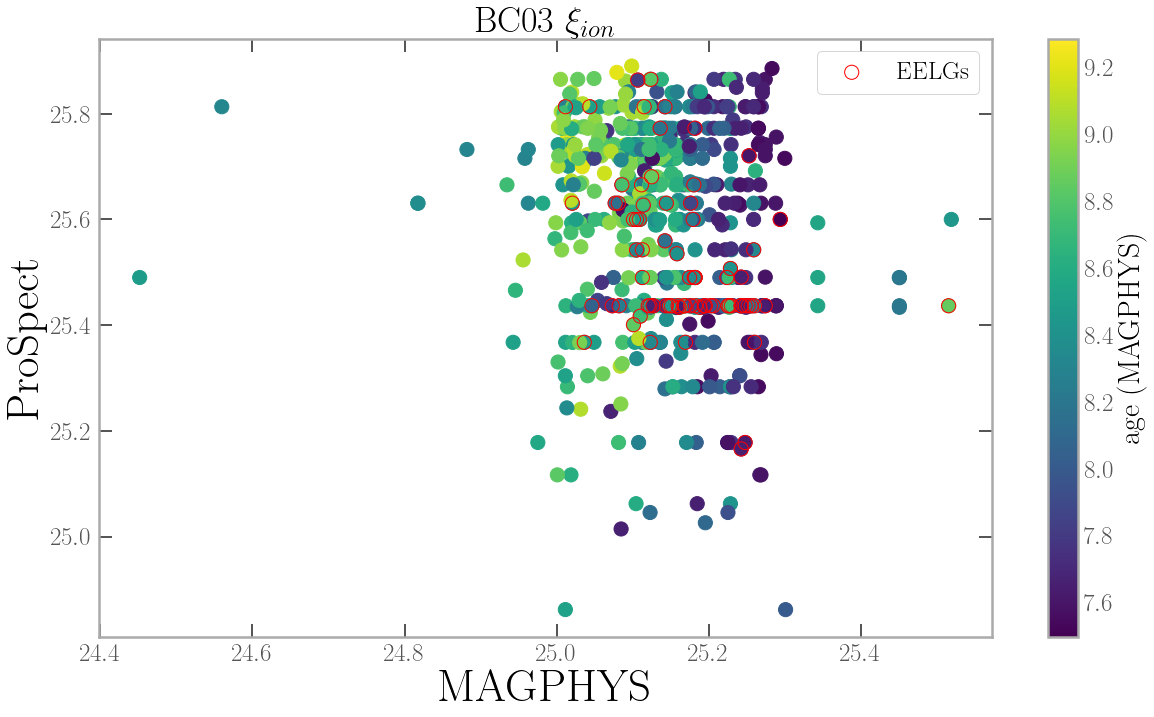

In [111]:
fig,ax=FancyPlot('MAGPHYS','ProSpect')
import matplotlib.cm as cm
plt.title(r'BC03 $\xi_{ion}$')
sc=plt.scatter(BFM['sion'],BC03['sion'],s=200,c=FM['age'],cmap=cm.viridis)
# sc = plt.scatter(subset_FM['M(stars)'],subset_F['M(stars)'],c=Montague2['plot'],cmap=cm.viridis,s=155,alpha=0.8,label='ZFOURGE Control')
# plt.scatter(FMELG['M(stars)'], FELG['M(stars)'], marker='o', s=160, c=Montatwo['plot'], cmap=cm.viridis, edgecolor='red',label='EELGs')

plt.colorbar(sc,label='age (MAGPHYS)')#,aspect=8,fraction=0.04)
# plt.cbar()
mask= BFM['id'].isin(stuff['id'])
plt.scatter(BFM.loc[mask,'sion'],BC03.loc[mask,'sion'],facecolors='none',edgecolors='red',s=200,label='EELGs')
# plt.plot(linspace(25,26,10),linspace(25,26,10),c='k')
plt.legend()

In [137]:
BC_params

,id,z,mSFR,mpeak,mperiod,mskew,tau_birth,tau_screen,alpha_SF_birth,alpha_SF_screen,Zfinal,LP,masstot,dustmass.birth,dustmass.screen,dustmass.total,dustlum.birth,dustlum.screen,dustlum.total,SFRburst,StellarMass,mSFR_LB,mpeak_LB,mperiod_LB,mskew_LB,tau_birth_LB,tau_screen_LB,alpha_SF_birth_LB,alpha_SF_screen_LB,Zfinal_LB,LP_LB,masstot_LB,dustmass.birth_LB,dustmass.screen_LB,dustmass.total_LB,dustlum.birth_LB,dustlum.screen_LB,dustlum.total_LB,SFRburst_LB,StellarMass_LB,mSFR_UB,mpeak_UB,mperiod_UB,mskew_UB,tau_birth_UB,tau_screen_UB,alpha_SF_birth_UB,alpha_SF_screen_UB,Zfinal_UB,LP_UB,masstot_UB,dustmass.birth_UB,dustmass.screen_UB,dustmass.total_UB,dustlum.birth_UB,dustlum.screen_UB,dustlum.total_UB,SFRburst_UB,StellarMass_UB
597,6020,2.50071,2.513482,6.650000e+09,0.665889,1.000000,1.127887,0.284336,0.389469,0.542747,-3.376967,-79.005565,3.850251e+12,2.273520e+07,5.555513e+07,7.829033e+07,2.017796e+12,4.080119e+12,6.097915e+12,287.869233,3.828564e+11,2.491865,6.650000e+09,0.3,0.993957,-0.110303,0.276097,0.000000,0.0,-3.881972,-84.194064,3.603517e+12,1.649670e+07,3.431848e+07,5.189150e+07,1.766142e+12,3.853112e+12,5.687792e+12,269.421798,3.583219e+11,2.513482,6.650000e+09,2.0,1.000000,1.500000,0.292082,1.243514,4.000000,-3.016918,-79.005565,3.850251e+12,2.218636e+08,5.010207e+10,5.011982e+10,2.151548e+12,4.293730e+12,6.384511e+12,287.869233,3.828564e+11
598,6235,2.77694,1.425999,6.650000e+09,0.984996,1.000000,-0.142702,-0.228176,2.498877,3.041020,-4.000000,-99.182346,3.147790e+11,9.124810e+08,2.073174e+09,2.985655e+09,1.552116e+11,2.339415e+11,3.891531e+11,23.534882,2.723192e+10,1.338557,6.650000e+09,0.3,0.993957,-0.749772,-0.251782,0.253277,0.0,-4.000000,-104.239352,2.573735e+11,7.237112e+05,1.848030e+06,6.127966e+06,6.525716e+10,2.071364e+11,3.078074e+11,19.242880,2.226569e+10,1.432446,6.650000e+09,2.0,1.000000,0.476794,-0.212191,3.274226,3.103821,-3.729540,-99.182346,3.194866e+11,1.676115e+09,2.246692e+09,3.078414e+09,1.761894e+11,2.692239e+11,3.941380e+11,23.886850,2.763917e+10
599,6329,2.55376,1.446749,6.650000e+09,1.020333,1.000000,-0.479126,-0.064826,3.620664,2.871540,-4.000000,-68.755653,3.301837e+11,1.327111e+09,2.689224e+09,4.016335e+09,1.216068e+11,3.337400e+11,4.553469e+11,24.686631,3.121811e+10,1.394695,6.650000e+09,0.3,0.994400,-1.129034,-0.109161,1.326790,0.0,-4.000000,-73.897240,2.896704e+11,1.193669e+07,2.545686e+06,1.486867e+07,3.556494e+10,2.574772e+11,3.502165e+11,21.657598,2.738767e+10,1.446749,6.650000e+09,2.0,1.000000,-0.192226,-0.061795,3.636064,3.830964,-2.869347,-68.755653,3.301837e+11,1.409127e+09,3.699599e+09,4.677625e+09,1.528829e+11,3.782245e+11,4.553469e+11,24.686631,3.121811e+10
600,6465,2.80100,1.413841,6.650000e+09,0.300000,1.000000,-0.552947,-2.087612,3.461761,1.366314,-4.000000,-129.708158,3.060889e+11,1.075360e+09,1.258808e+06,1.076619e+09,1.029841e+11,6.499976e+09,1.094841e+11,22.885149,2.648012e+10,1.391018,6.650000e+09,0.3,0.994400,-0.704458,-4.556962,0.952829,0.0,-4.000000,-133.354213,2.861579e+11,3.085991e+06,1.933546e+02,3.177971e+06,7.935958e+10,2.194355e+07,8.030929e+10,21.394980,2.475586e+10,1.414800,6.650000e+09,2.0,1.000000,-0.521222,-1.755344,4.000000,2.376953,-3.776062,-129.708158,3.067655e+11,1.180709e+09,3.003141e+07,1.180757e+09,1.054268e+11,1.410003e+10,1.112963e+11,22.935737,2.653865e+10
601,6525,2.87872,1.579642,6.650000e+09,0.372449,1.000000,-0.369326,-0.291998,0.796096,1.398071,-4.000000,-81.646494,4.483833e+11,4.153063e+06,7.441165e+07,7.856471e+07,1.856746e+11,3.321164e+11,5.177910e+11,33.523987,3.697878e+10,1.556558,6.650000e+09,0.3,0.993957,-0.831922,-0.296822,0.000000,0.0,-4.000000,-86.772902,4.205016e+11,8.710345e+05,2.790826e+06,4.135351e+06,9.024877e+10,3.140930e+11,4.506474e+11,31.439374,3.467934e+10,1.591053,6.650000e+09,2.0,1.000000,-0.253386,-0.260218,1.461671,3.090171,-3.435401,-81.646494,4.603196e+11,5.565053e+07,3.338770e+09,3.340064e+09,2.053161e+11,3.966972e+11,5.372167e+11,34.416420,3.796319e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

/tmp/ipykernel_1948471/2335613774.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


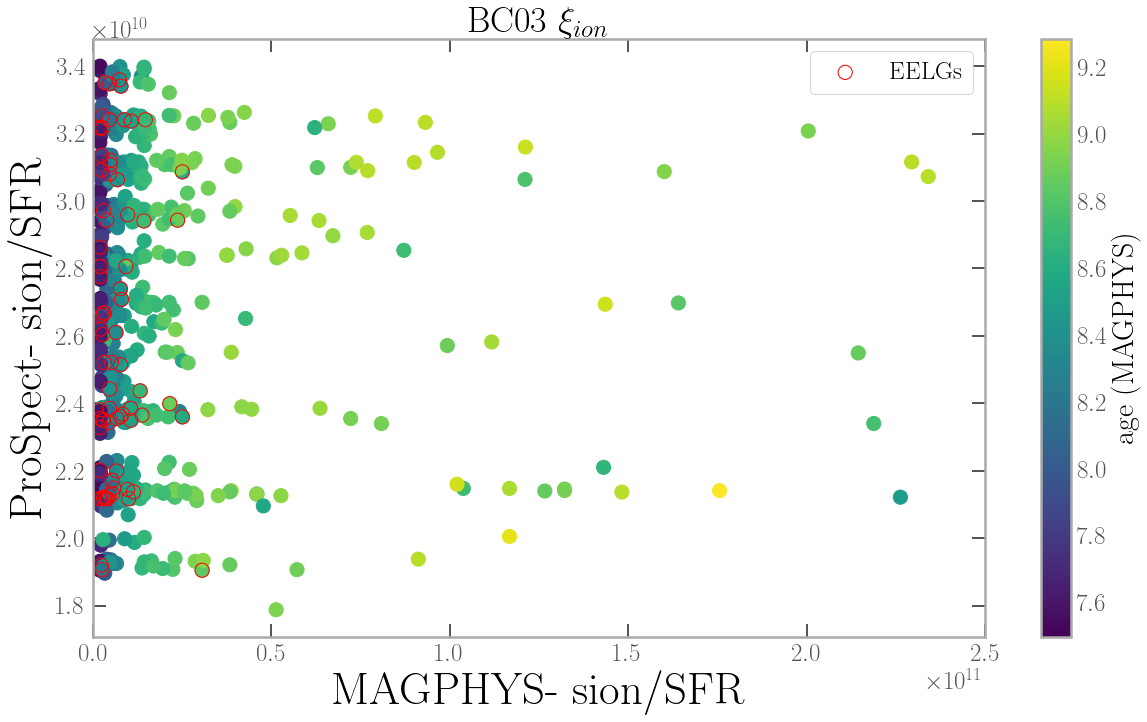

In [143]:
fig,ax=FancyPlot('MAGPHYS- sion/SFR','ProSpect- sion/SFR')
import matplotlib.cm as cm
plt.title(r'BC03 $\xi_{ion}$')
sc=plt.scatter(BFM['sion']/FM['sSFR'],BC03['sion']/(BC_params['SFRburst']/BC_params['StellarMass']),s=200,c=FM['age'],cmap=cm.viridis)
# sc = plt.scatter(subset_FM['M(stars)'],subset_F['M(stars)'],c=Montague2['plot'],cmap=cm.viridis,s=155,alpha=0.8,label='ZFOURGE Control')
# plt.scatter(FMELG['M(stars)'], FELG['M(stars)'], marker='o', s=160, c=Montatwo['plot'], cmap=cm.viridis, edgecolor='red',label='EELGs')

plt.colorbar(sc,label='age (MAGPHYS)')#,aspect=8,fraction=0.04)
# plt.cbar()
mask= BFM['id'].isin(stuff['id'])
plt.scatter(BFM.loc[mask,'sion']/FM.loc[mask,'sSFR'],BC03.loc[mask,'sion']/(BC_params.loc[mask,'SFRburst']/BC_params.loc[mask,'StellarMass']),facecolors='none',edgecolors='red',s=200,label='EELGs')
# plt.plot(linspace(25,26,10),linspace(25,26,10),c='k')
ax.set_xlim(0,0.25*10**12)
plt.legend()

Text(0.5, 0, 'sion')

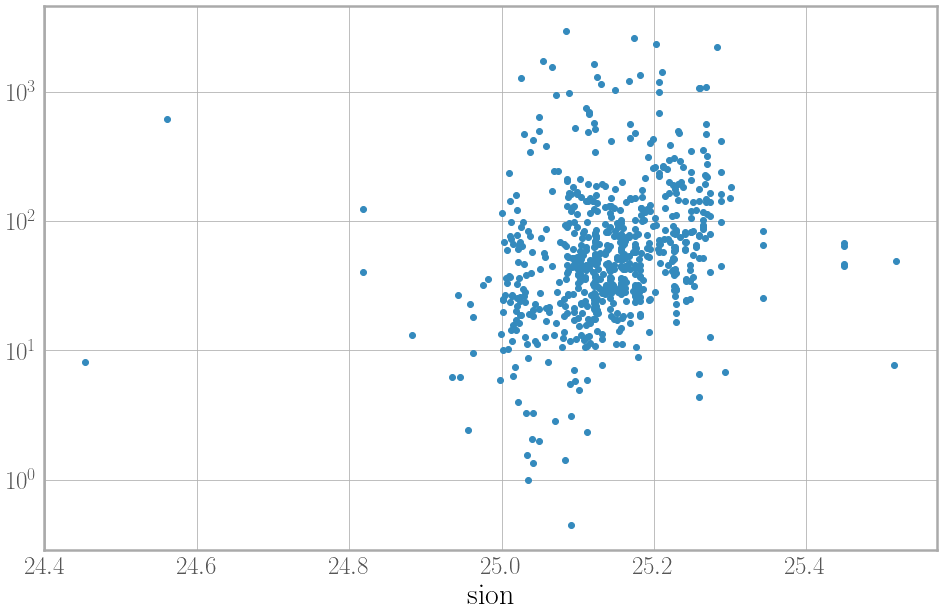

In [146]:
plt.figure(figsize=(16,10))
plt.scatter(BFM['sion'],FM['SFR'])
plt.yscale('log')
plt.xlabel('sion')

In [113]:
BC_params #What is age in MAGPHYS
#ProSpect - What is the epoch at which half of your stars have formed

,id,z,mSFR,mpeak,mperiod,mskew,tau_birth,tau_screen,alpha_SF_birth,alpha_SF_screen,Zfinal,LP,masstot,dustmass.birth,dustmass.screen,dustmass.total,dustlum.birth,dustlum.screen,dustlum.total,SFRburst,StellarMass,mSFR_LB,mpeak_LB,mperiod_LB,mskew_LB,tau_birth_LB,tau_screen_LB,alpha_SF_birth_LB,alpha_SF_screen_LB,Zfinal_LB,LP_LB,masstot_LB,dustmass.birth_LB,dustmass.screen_LB,dustmass.total_LB,dustlum.birth_LB,dustlum.screen_LB,dustlum.total_LB,SFRburst_LB,StellarMass_LB,mSFR_UB,mpeak_UB,mperiod_UB,mskew_UB,tau_birth_UB,tau_screen_UB,alpha_SF_birth_UB,alpha_SF_screen_UB,Zfinal_UB,LP_UB,masstot_UB,dustmass.birth_UB,dustmass.screen_UB,dustmass.total_UB,dustlum.birth_UB,dustlum.screen_UB,dustlum.total_UB,SFRburst_UB,StellarMass_UB
597,6020,2.50071,2.513482,6.650000e+09,0.665889,1.000000,1.127887,0.284336,0.389469,0.542747,-3.376967,-79.005565,3.850251e+12,2.273520e+07,5.555513e+07,7.829033e+07,2.017796e+12,4.080119e+12,6.097915e+12,287.869233,3.828564e+11,2.491865,6.650000e+09,0.3,0.993957,-0.110303,0.276097,0.000000,0.0,-3.881972,-84.194064,3.603517e+12,1.649670e+07,3.431848e+07,5.189150e+07,1.766142e+12,3.853112e+12,5.687792e+12,269.421798,3.583219e+11,2.513482,6.650000e+09,2.0,1.000000,1.500000,0.292082,1.243514,4.000000,-3.016918,-79.005565,3.850251e+12,2.218636e+08,5.010207e+10,5.011982e+10,2.151548e+12,4.293730e+12,6.384511e+12,287.869233,3.828564e+11
598,6235,2.77694,1.425999,6.650000e+09,0.984996,1.000000,-0.142702,-0.228176,2.498877,3.041020,-4.000000,-99.182346,3.147790e+11,9.124810e+08,2.073174e+09,2.985655e+09,1.552116e+11,2.339415e+11,3.891531e+11,23.534882,2.723192e+10,1.338557,6.650000e+09,0.3,0.993957,-0.749772,-0.251782,0.253277,0.0,-4.000000,-104.239352,2.573735e+11,7.237112e+05,1.848030e+06,6.127966e+06,6.525716e+10,2.071364e+11,3.078074e+11,19.242880,2.226569e+10,1.432446,6.650000e+09,2.0,1.000000,0.476794,-0.212191,3.274226,3.103821,-3.729540,-99.182346,3.194866e+11,1.676115e+09,2.246692e+09,3.078414e+09,1.761894e+11,2.692239e+11,3.941380e+11,23.886850,2.763917e+10
599,6329,2.55376,1.446749,6.650000e+09,1.020333,1.000000,-0.479126,-0.064826,3.620664,2.871540,-4.000000,-68.755653,3.301837e+11,1.327111e+09,2.689224e+09,4.016335e+09,1.216068e+11,3.337400e+11,4.553469e+11,24.686631,3.121811e+10,1.394695,6.650000e+09,0.3,0.994400,-1.129034,-0.109161,1.326790,0.0,-4.000000,-73.897240,2.896704e+11,1.193669e+07,2.545686e+06,1.486867e+07,3.556494e+10,2.574772e+11,3.502165e+11,21.657598,2.738767e+10,1.446749,6.650000e+09,2.0,1.000000,-0.192226,-0.061795,3.636064,3.830964,-2.869347,-68.755653,3.301837e+11,1.409127e+09,3.699599e+09,4.677625e+09,1.528829e+11,3.782245e+11,4.553469e+11,24.686631,3.121811e+10
600,6465,2.80100,1.413841,6.650000e+09,0.300000,1.000000,-0.552947,-2.087612,3.461761,1.366314,-4.000000,-129.708158,3.060889e+11,1.075360e+09,1.258808e+06,1.076619e+09,1.029841e+11,6.499976e+09,1.094841e+11,22.885149,2.648012e+10,1.391018,6.650000e+09,0.3,0.994400,-0.704458,-4.556962,0.952829,0.0,-4.000000,-133.354213,2.861579e+11,3.085991e+06,1.933546e+02,3.177971e+06,7.935958e+10,2.194355e+07,8.030929e+10,21.394980,2.475586e+10,1.414800,6.650000e+09,2.0,1.000000,-0.521222,-1.755344,4.000000,2.376953,-3.776062,-129.708158,3.067655e+11,1.180709e+09,3.003141e+07,1.180757e+09,1.054268e+11,1.410003e+10,1.112963e+11,22.935737,2.653865e+10
601,6525,2.87872,1.579642,6.650000e+09,0.372449,1.000000,-0.369326,-0.291998,0.796096,1.398071,-4.000000,-81.646494,4.483833e+11,4.153063e+06,7.441165e+07,7.856471e+07,1.856746e+11,3.321164e+11,5.177910e+11,33.523987,3.697878e+10,1.556558,6.650000e+09,0.3,0.993957,-0.831922,-0.296822,0.000000,0.0,-4.000000,-86.772902,4.205016e+11,8.710345e+05,2.790826e+06,4.135351e+06,9.024877e+10,3.140930e+11,4.506474e+11,31.439374,3.467934e+10,1.591053,6.650000e+09,2.0,1.000000,-0.253386,-0.260218,1.461671,3.090171,-3.435401,-81.646494,4.603196e+11,5.565053e+07,3.338770e+09,3.340064e+09,2.053161e+11,3.966972e+11,5.372167e+11,34.416420,3.796319e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

/tmp/ipykernel_1948471/2335613774.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


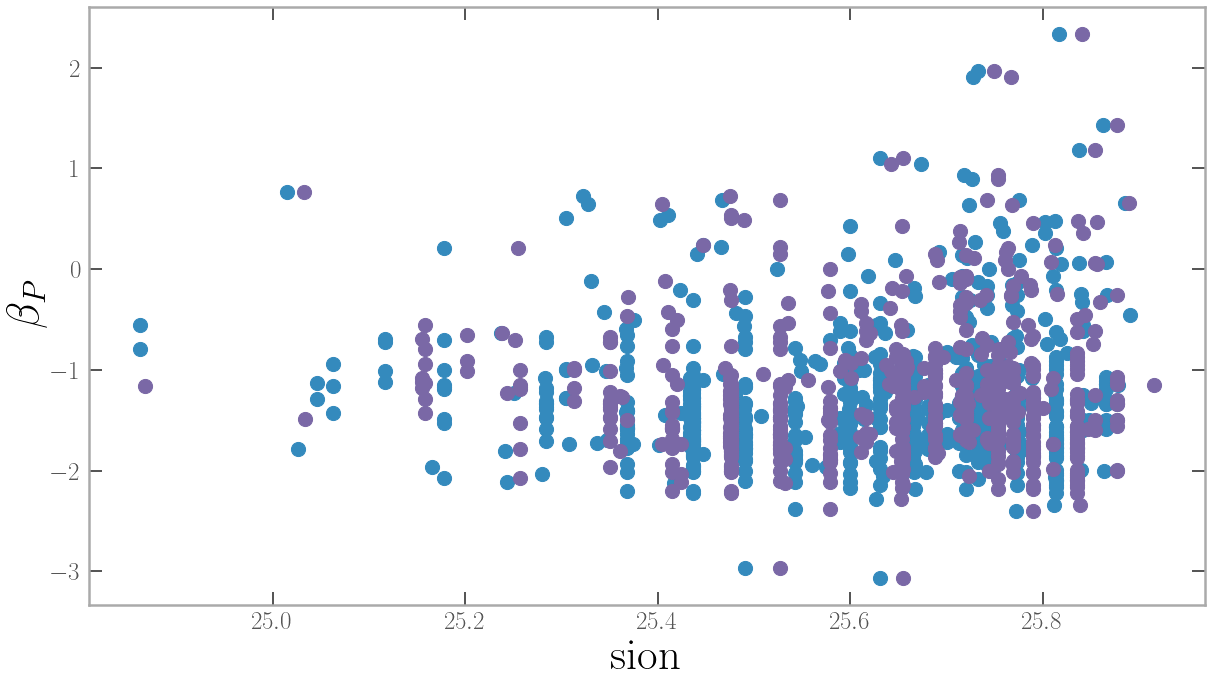

In [115]:
fig,ax=FancyPlot('sion',r'$\beta_P$')
# plt.scatter(BFM['sion'],BFM['betaP'],label='MAGPHYS',s=200)
plt.scatter(BC03['sion'],BFM['betaP'],label='BC03',s=200)
plt.scatter(BPASS['sion'],BFM['betaP'],label='BPASS',s=200)


/tmp/ipykernel_1948471/2335613774.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


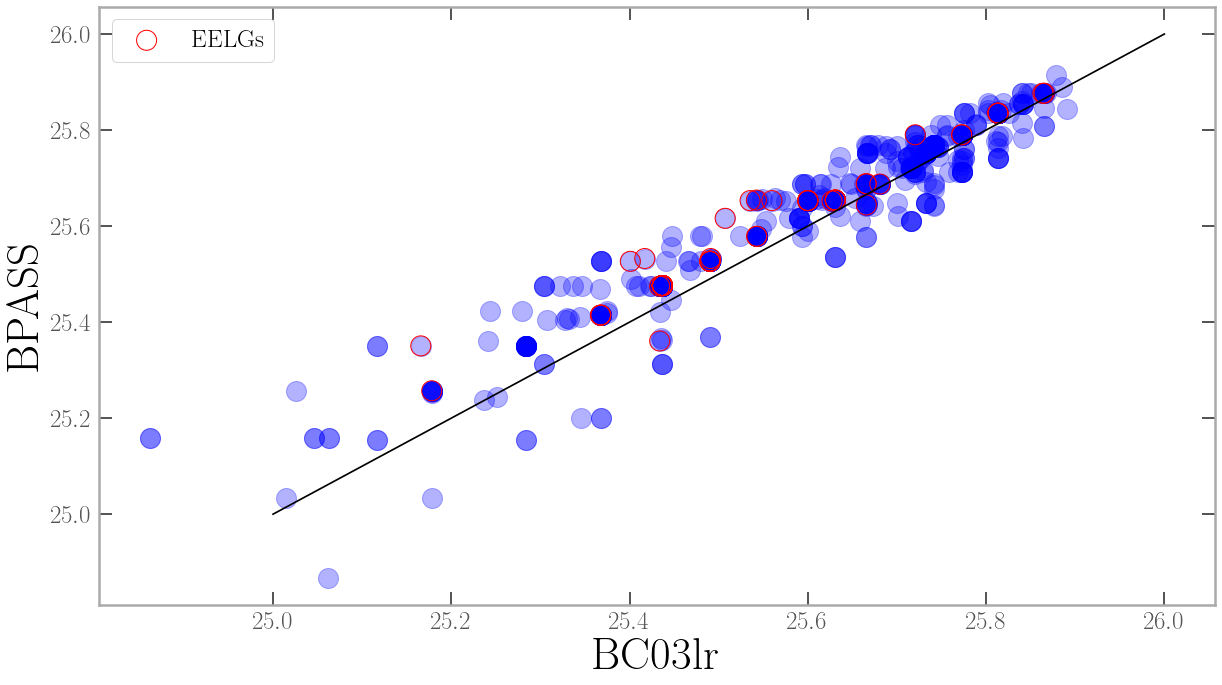

In [39]:
fig,ax=FancyPlot('BC03lr','BPASS')
mask=BFM['id'].isin(stuff['id'])
# plt.title(r'ProSpect $\xi_{ion}$')
ax.scatter(BC03['sion'],BPASS['sion'],s=400,c='blue',alpha=0.3)
# # plt.hist(BPASS['sion'],bins=10)
ax.scatter(BC03.loc[mask,'sion'],BPASS.loc[mask,'sion'],label='EELGs',s=400,edgecolor='red',facecolor='None')
ax.plot(linspace(25,26,10),linspace(25,26,10),c='k')
plt.legend(loc='best')

/tmp/ipykernel_1948471/2335613774.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


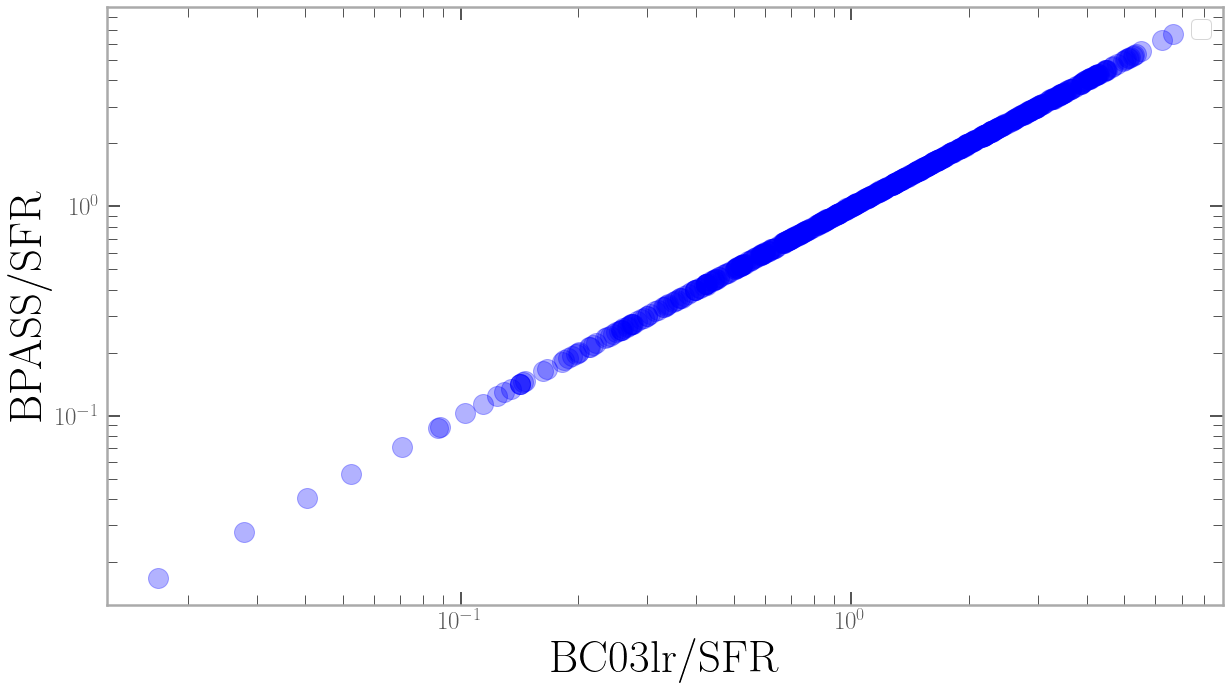

In [57]:
fig,ax=FancyPlot('BC03lr/SFR','BPASS/SFR')
mask=BFM['id'].isin(stuff['id'])
# plt.title(r'ProSpect $\xi_{ion}$')
ax.scatter(BC03['sion']/BC_params['SFRburst'],BPASS['sion']/BP_params['SFRburst'],s=400,c='blue',alpha=0.3)
# # plt.hist(BPASS['sion'],bins=10)
# ax.scatter(BC03.loc[mask,'sion']/BC_params[mask,'SFRburst'],BPASS.loc[mask,'sion']/BP_params[mask,'SFRburst'],label='EELGs',s=400,edgecolor='red',facecolor='None')
# ax.plot(linspace(25,26,10),linspace(25,26,10),c='k')
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend(loc='best')

/tmp/ipykernel_1948471/2335613774.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


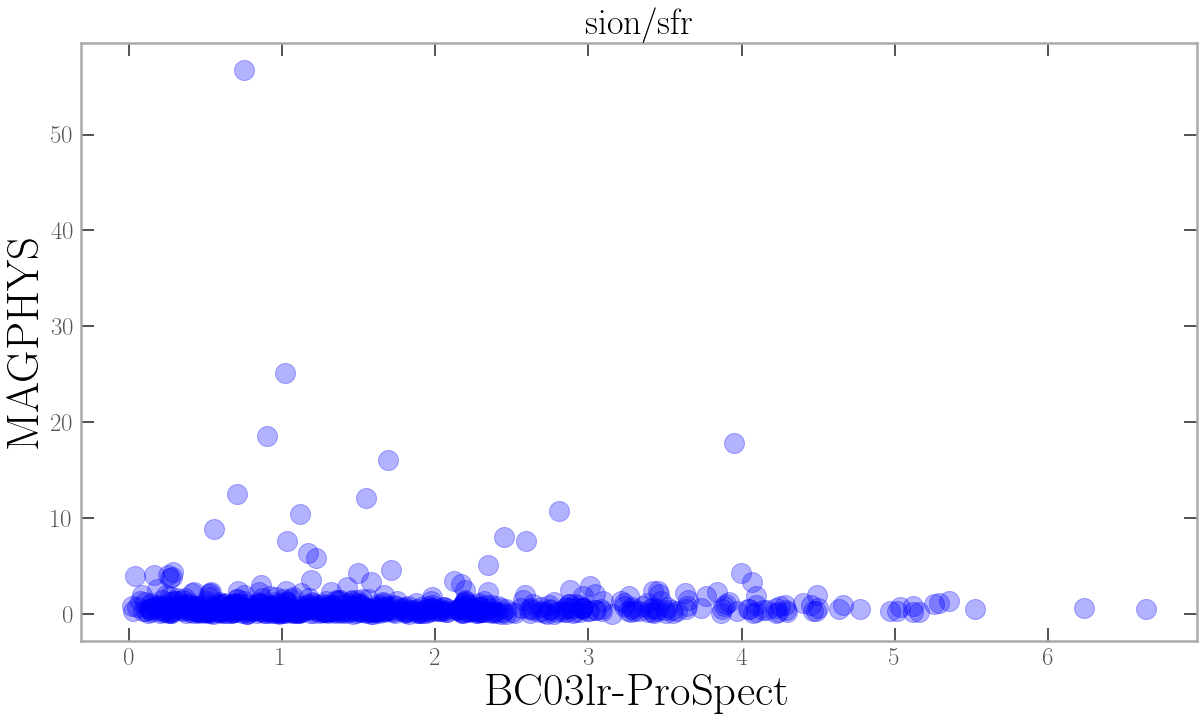

In [63]:
fig,ax=FancyPlot('BC03lr-ProSpect','MAGPHYS')
plt.title('sion/sfr')

ax.scatter(BC03['sion']/BC_params['SFRburst'],BFM['sion']/FM['SFR'],s=400,c='blue',alpha=0.3)


/tmp/ipykernel_1948471/2335613774.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


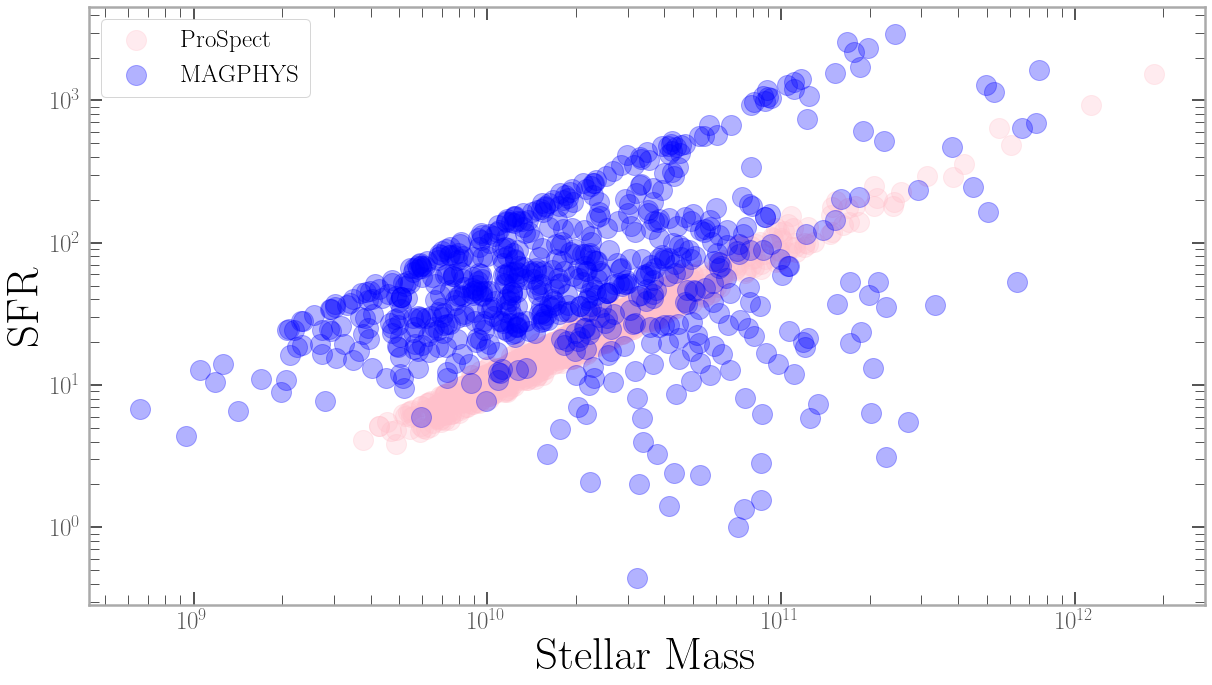

In [119]:
fig,ax=FancyPlot('Stellar Mass','SFR')
# mask=BFM['id'].isin(stuff['id'])
# plt.title(r'ProSpect $\xi_{ion}$')
ax.scatter(BC_params['StellarMass'],BC_params['SFRburst'],s=400,c='pink',alpha=0.3,label='ProSpect')
ax.scatter(FM['M(stars)'],FM['SFR'],s=400,c='blue',alpha=0.3,label='MAGPHYS')

# # plt.hist(BPASS['sion'],bins=10)
# ax.scatter(BC03.loc[mask,'sion']/BC_params[mask,'SFRburst'],BPASS.loc[mask,'sion']/BP_params[mask,'SFRburst'],label='EELGs',s=400,edgecolor='red',facecolor='None')
# ax.plot(linspace(25,26,10),linspace(25,26,10),c='k')
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend(loc='best')

/tmp/ipykernel_1948471/2335613774.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


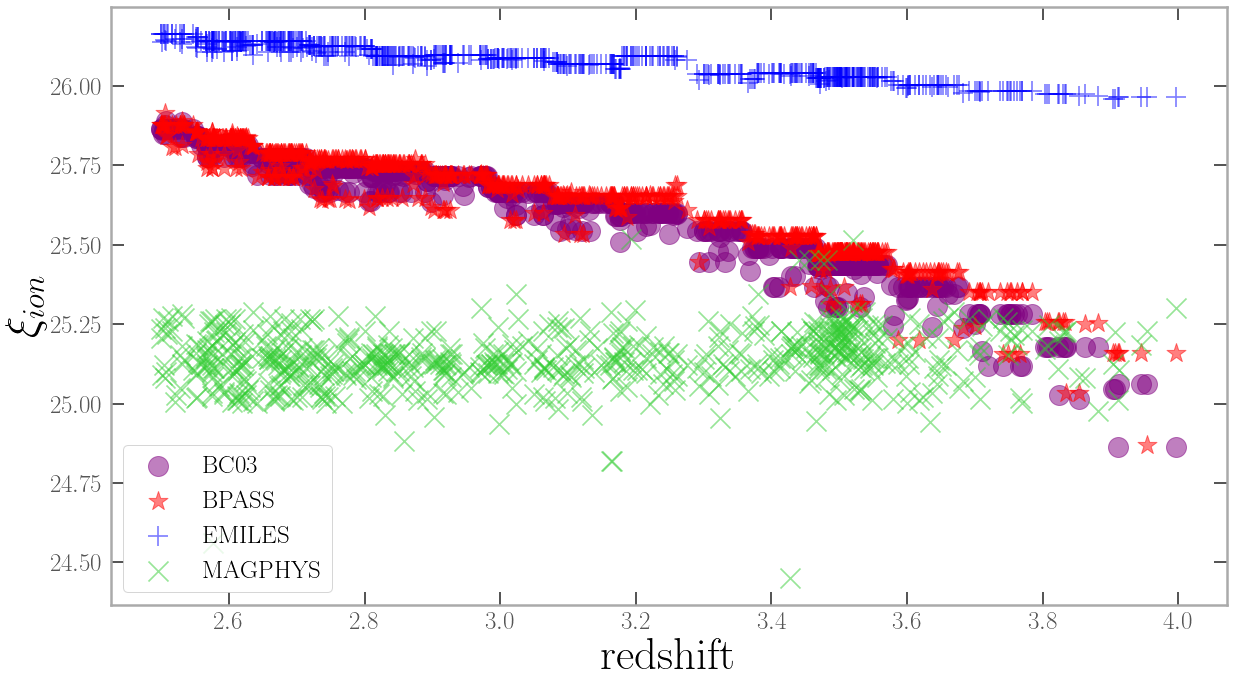

In [82]:
fig,ax=FancyPlot('redshift',r'$\xi_{ion}$')
ax.scatter(BC_params['z'],BC03['sion'],s=400,c='purple',alpha=0.5,label='BC03')
ax.scatter(BP_params['z'],BPASS['sion'],s=400,c='red',alpha=0.5,label='BPASS',marker='*')
ax.scatter(EM_params['z'],EMILES['sion'],s=400,c='blue',alpha=0.5,label='EMILES',marker='+')

ax.scatter(FM['redshift'],BFM['sion'],s=400,c='limegreen',alpha=0.5,label='MAGPHYS',marker='x')
ax.legend()

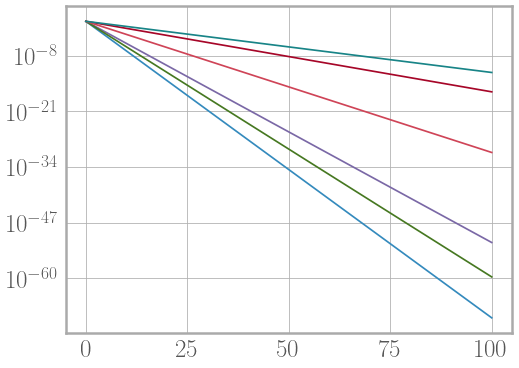

In [136]:
plt.plot(linspace(0,100,10),exp(-FM.iloc[0]['gamma']*linspace(0,100,10)))
plt.plot(linspace(0,100,10),exp(-FM.iloc[1]['gamma']*linspace(0,100,10)))
plt.plot(linspace(0,100,10),exp(-FM.iloc[2]['gamma']*linspace(0,100,10)))
plt.plot(linspace(0,100,10),exp(-FM.iloc[3]['gamma']*linspace(0,100,10)))
plt.plot(linspace(0,100,10),exp(-FM.iloc[4]['gamma']*linspace(0,100,10)))
plt.plot(linspace(0,100,10),exp(-FM.iloc[5]['gamma']*linspace(0,100,10)))
plt.yscale('log')

In [ ]:
BC_params['']

In [53]:
pd.set_option('display.max_columns', None)
BC_params

,id,z,mSFR,mpeak,mperiod,mskew,tau_birth,tau_screen,alpha_SF_birth,alpha_SF_screen,Zfinal,LP,masstot,dustmass.birth,dustmass.screen,dustmass.total,dustlum.birth,dustlum.screen,dustlum.total,SFRburst,StellarMass,mSFR_LB,mpeak_LB,mperiod_LB,mskew_LB,tau_birth_LB,tau_screen_LB,alpha_SF_birth_LB,alpha_SF_screen_LB,Zfinal_LB,LP_LB,masstot_LB,dustmass.birth_LB,dustmass.screen_LB,dustmass.total_LB,dustlum.birth_LB,dustlum.screen_LB,dustlum.total_LB,SFRburst_LB,StellarMass_LB,mSFR_UB,mpeak_UB,mperiod_UB,mskew_UB,tau_birth_UB,tau_screen_UB,alpha_SF_birth_UB,alpha_SF_screen_UB,Zfinal_UB,LP_UB,masstot_UB,dustmass.birth_UB,dustmass.screen_UB,dustmass.total_UB,dustlum.birth_UB,dustlum.screen_UB,dustlum.total_UB,SFRburst_UB,StellarMass_UB
597,6020,2.50071,2.513482,6.650000e+09,0.665889,1.000000,1.127887,0.284336,0.389469,0.542747,-3.376967,-79.005565,3.850251e+12,2.273520e+07,5.555513e+07,7.829033e+07,2.017796e+12,4.080119e+12,6.097915e+12,287.869233,3.828564e+11,2.491865,6.650000e+09,0.3,0.993957,-0.110303,0.276097,0.000000,0.0,-3.881972,-84.194064,3.603517e+12,1.649670e+07,3.431848e+07,5.189150e+07,1.766142e+12,3.853112e+12,5.687792e+12,269.421798,3.583219e+11,2.513482,6.650000e+09,2.0,1.000000,1.500000,0.292082,1.243514,4.000000,-3.016918,-79.005565,3.850251e+12,2.218636e+08,5.010207e+10,5.011982e+10,2.151548e+12,4.293730e+12,6.384511e+12,287.869233,3.828564e+11
598,6235,2.77694,1.425999,6.650000e+09,0.984996,1.000000,-0.142702,-0.228176,2.498877,3.041020,-4.000000,-99.182346,3.147790e+11,9.124810e+08,2.073174e+09,2.985655e+09,1.552116e+11,2.339415e+11,3.891531e+11,23.534882,2.723192e+10,1.338557,6.650000e+09,0.3,0.993957,-0.749772,-0.251782,0.253277,0.0,-4.000000,-104.239352,2.573735e+11,7.237112e+05,1.848030e+06,6.127966e+06,6.525716e+10,2.071364e+11,3.078074e+11,19.242880,2.226569e+10,1.432446,6.650000e+09,2.0,1.000000,0.476794,-0.212191,3.274226,3.103821,-3.729540,-99.182346,3.194866e+11,1.676115e+09,2.246692e+09,3.078414e+09,1.761894e+11,2.692239e+11,3.941380e+11,23.886850,2.763917e+10
599,6329,2.55376,1.446749,6.650000e+09,1.020333,1.000000,-0.479126,-0.064826,3.620664,2.871540,-4.000000,-68.755653,3.301837e+11,1.327111e+09,2.689224e+09,4.016335e+09,1.216068e+11,3.337400e+11,4.553469e+11,24.686631,3.121811e+10,1.394695,6.650000e+09,0.3,0.994400,-1.129034,-0.109161,1.326790,0.0,-4.000000,-73.897240,2.896704e+11,1.193669e+07,2.545686e+06,1.486867e+07,3.556494e+10,2.574772e+11,3.502165e+11,21.657598,2.738767e+10,1.446749,6.650000e+09,2.0,1.000000,-0.192226,-0.061795,3.636064,3.830964,-2.869347,-68.755653,3.301837e+11,1.409127e+09,3.699599e+09,4.677625e+09,1.528829e+11,3.782245e+11,4.553469e+11,24.686631,3.121811e+10
600,6465,2.80100,1.413841,6.650000e+09,0.300000,1.000000,-0.552947,-2.087612,3.461761,1.366314,-4.000000,-129.708158,3.060889e+11,1.075360e+09,1.258808e+06,1.076619e+09,1.029841e+11,6.499976e+09,1.094841e+11,22.885149,2.648012e+10,1.391018,6.650000e+09,0.3,0.994400,-0.704458,-4.556962,0.952829,0.0,-4.000000,-133.354213,2.861579e+11,3.085991e+06,1.933546e+02,3.177971e+06,7.935958e+10,2.194355e+07,8.030929e+10,21.394980,2.475586e+10,1.414800,6.650000e+09,2.0,1.000000,-0.521222,-1.755344,4.000000,2.376953,-3.776062,-129.708158,3.067655e+11,1.180709e+09,3.003141e+07,1.180757e+09,1.054268e+11,1.410003e+10,1.112963e+11,22.935737,2.653865e+10
601,6525,2.87872,1.579642,6.650000e+09,0.372449,1.000000,-0.369326,-0.291998,0.796096,1.398071,-4.000000,-81.646494,4.483833e+11,4.153063e+06,7.441165e+07,7.856471e+07,1.856746e+11,3.321164e+11,5.177910e+11,33.523987,3.697878e+10,1.556558,6.650000e+09,0.3,0.993957,-0.831922,-0.296822,0.000000,0.0,-4.000000,-86.772902,4.205016e+11,8.710345e+05,2.790826e+06,4.135351e+06,9.024877e+10,3.140930e+11,4.506474e+11,31.439374,3.467934e+10,1.591053,6.650000e+09,2.0,1.000000,-0.253386,-0.260218,1.461671,3.090171,-3.435401,-81.646494,4.603196e+11,5.565053e+07,3.338770e+09,3.340064e+09,2.053161e+11,3.966972e+11,5.372167e+11,34.416420,3.796319e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

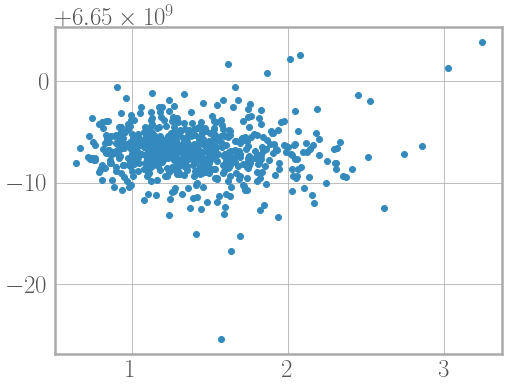

In [104]:
plt.scatter(BC_params['mSFR'],BC_params['mpeak'])

/tmp/ipykernel_1948471/2335613774.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


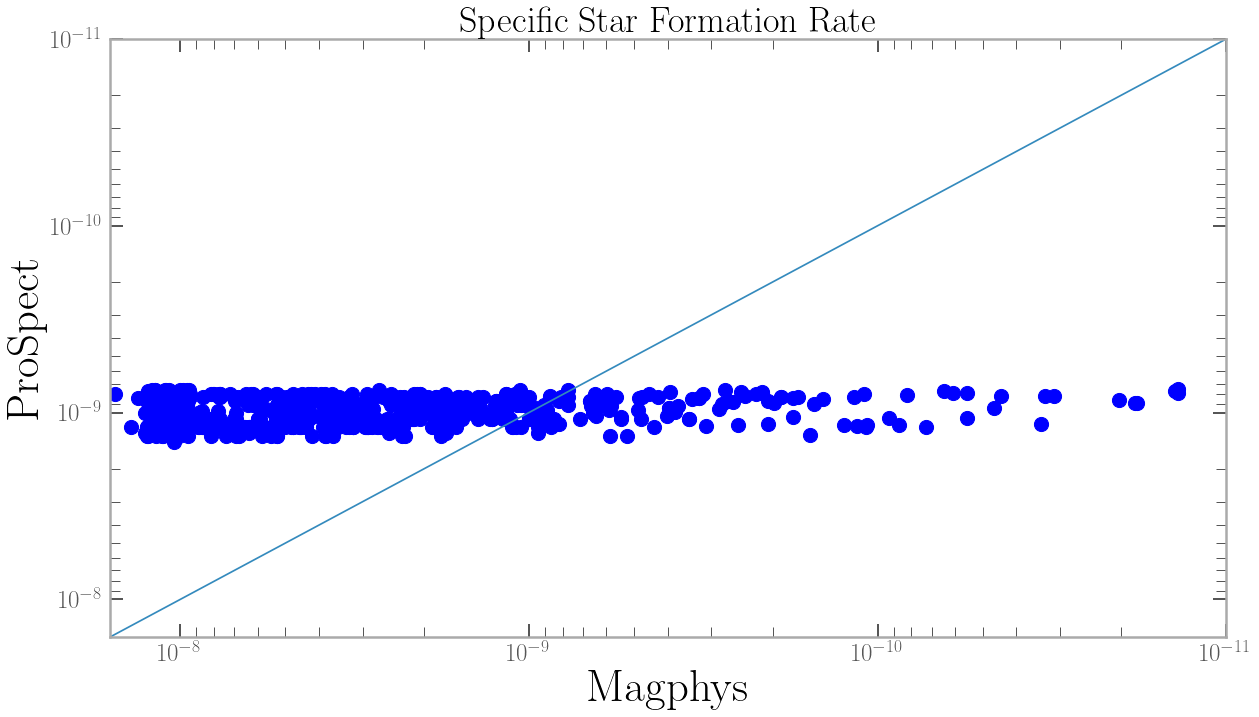

In [120]:
# plt.figure(figsize=(16,10))
fig,ax=FancyPlot('Magphys','ProSpect')
plt.title('Specific Star Formation Rate')
ax.scatter(FM['SFR']/FM['M(stars)'],
BC_params['SFRburst']/BC_params['StellarMass'],s=200,c='blue')
ax.set_ylim(10**-7.8,10**-11)
ax.set_xlim(10**-7.8,10**-11)
ax.plot(linspace(-10,1,10),linspace(-10,1,10))

plt.xscale('log')
plt.yscale('log')
# ax.set_aspect('equal')


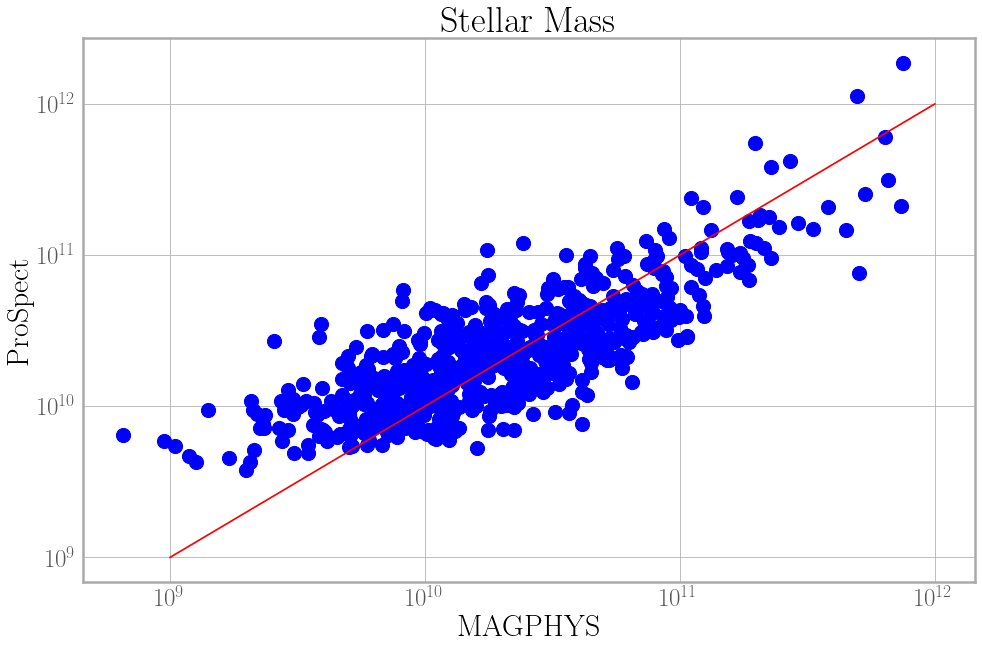

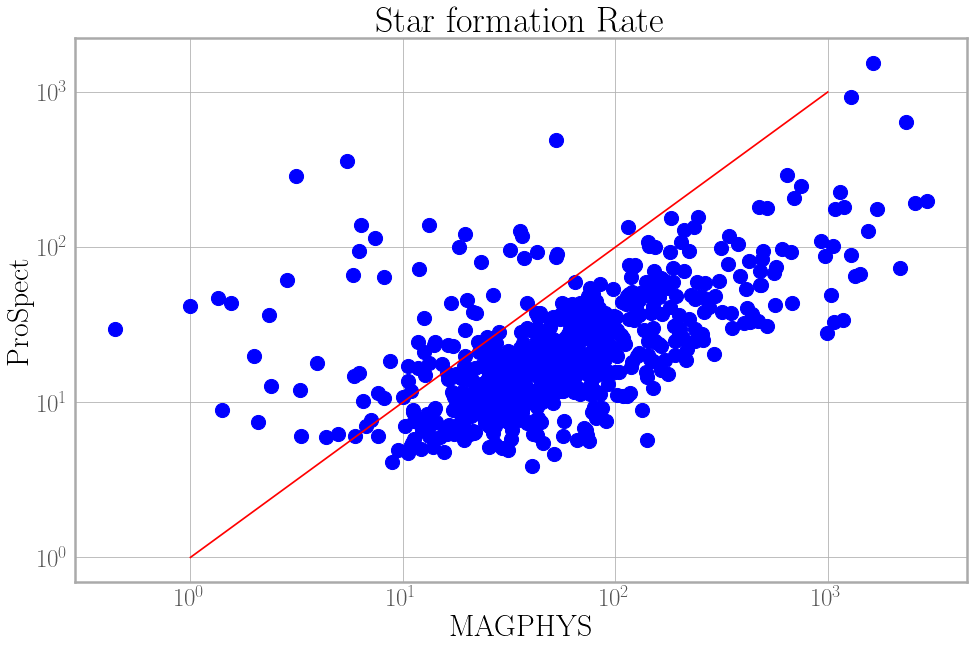

In [123]:
plt.figure(figsize=(16,10))
plt.title('Stellar Mass')
plt.scatter(FM['M(stars)'],
BC_params['StellarMass'],s=200,c='blue')
plt.plot(linspace(10**9,10**12,10),linspace(10**9,10**12,10),c='red')
plt.xlabel('MAGPHYS')
plt.ylabel('ProSpect')
plt.xscale('log')
plt.yscale('log')
plt.figure(figsize=(16,10))
plt.title('Star formation Rate')
plt.xlabel('MAGPHYS')
plt.ylabel('ProSpect')
plt.scatter(FM['SFR'],
BC_params['SFRburst'],s=200,c='blue')
plt.plot(linspace(1,10**3,10),linspace(1,10**3,10),c='red')

plt.xscale('log')
plt.yscale('log')